# Image IPP coding

In [42]:
sequence = "bus"

## Without I-type blocks

In [43]:
!sed -z -i 's/\n#import image_IPP as IPP\n/\nimport image_IPP as IPP\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as IPP\n/\n#import image_IPP_adaptive as IPP as IPP\n/g' RD_curve.py

In [44]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
import image_IPP as IPP
#import image_IPP_adaptive as IPP as IPP


In [45]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.6502998737373737 KBPS: 5933.232 Average AMSE: 40.23701402041246
     2	Q_step: 22 BPP: 0.6091172138047138 KBPS: 5557.488 Average AMSE: 46.44224076704545
     3	Q_step: 23 BPP: 0.5719170875420876 KBPS: 5218.08 Average AMSE: 53.78369765361953
     4	Q_step: 24 BPP: 0.5357691498316498 KBPS: 4888.272 Average AMSE: 61.93255405618686
     5	Q_step: 25 BPP: 0.5032617845117845 KBPS: 4591.68 Average AMSE: 72.17383667403199
     6	Q_step: 26 BPP: 0.47454229797979797 KBPS: 4329.648 Average AMSE: 84.3615714436027
     7	Q_step: 27 BPP: 0.44740109427609426 KBPS: 4082.016 Average AMSE: 96.93620646569865
     8	Q_step: 28 BPP: 0.4213752104377104 KBPS: 3844.56 Average AMSE: 112.97927451599325
     9	Q_step: 29 BPP: 0.39844802188552186 KBPS: 3635.376 Average AMSE: 131.038765256734
    10	Q_step: 30 BPP: 0.37891940235690236 KBPS: 3457.2 Average AMSE: 151.45288036616162
    11	Q_step: 31 BPP: 0.3596275252525252 KBPS: 3281.184 Average AMSE: 173.24382694128786
    12	Q_step: 32 BPP

In [48]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_no_intrablocks.txt

In [49]:
!cat /tmp/curve_no_intrablocks.txt

0.6502998737373737	40.23701402041246
0.6091172138047138	46.44224076704545
0.5719170875420876	53.78369765361953
0.5357691498316498	61.93255405618686
0.5032617845117845	72.17383667403199
0.47454229797979797	84.3615714436027
0.44740109427609426	96.93620646569865
0.4213752104377104	112.97927451599325
0.39844802188552186	131.038765256734
0.37891940235690236	151.45288036616162
0.3596275252525252	173.24382694128786
0.34369739057239057	198.3333313604798
0.3287773569023569	227.35677675189396
0.31730850168350166	257.1177043876263
0.3072864057239057	289.77433514835855
0.2974484427609428	325.8094690393518
0.2912510521885522	365.1143406723485
0.28478009259259257	403.82465803872054
0.28002946127946127	441.49999671191074
0.2754682239057239	485.52279369212954
0.2719960016835017	530.1984868213384


In [50]:
RD_points_no_intrablocks = []
with open("/tmp/curve_no_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_no_intrablocks.append((float(rate), float(_distortion)))

## With I-type blocks

In [51]:
!sed -z -i 's/\nimport image_IPP as IPP/\n#import image_IPP as IPP/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as IPP\n/\nimport image_IPP_adaptive as IPP\n/g' RD_curve.py

In [52]:
!grep import RD_curve.py

import distortion
import frame
#import image_interpolated_IPP as IPP
#import image_IPP as IPP
import image_IPP_adaptive as IPP


In [53]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.2743897306397306 KBPS: 2503.488 Average AMSE: 36.5884969486532
     2	Q_step: 22 BPP: 0.27434238215488216 KBPS: 2503.056 Average AMSE: 42.61012863005051
     3	Q_step: 23 BPP: 0.2743634259259259 KBPS: 2503.248 Average AMSE: 49.78445983270201
     4	Q_step: 24 BPP: 0.2744370791245791 KBPS: 2503.92 Average AMSE: 57.356583412247474
     5	Q_step: 25 BPP: 0.27447916666666666 KBPS: 2504.304 Average AMSE: 66.67701888678451
     6	Q_step: 26 BPP: 0.27445286195286195 KBPS: 2504.064 Average AMSE: 78.68623013994109
     7	Q_step: 27 BPP: 0.2745054713804714 KBPS: 2504.544 Average AMSE: 91.28409156670875
     8	Q_step: 28 BPP: 0.27452651515151516 KBPS: 2504.736 Average AMSE: 106.07794415509258
     9	Q_step: 29 BPP: 0.27447916666666666 KBPS: 2504.304 Average AMSE: 123.24036129524411
    10	Q_step: 30 BPP: 0.2745738636363636 KBPS: 2505.168 Average AMSE: 144.69880576599326
    11	Q_step: 31 BPP: 0.2745843855218855 KBPS: 2505.264 Average AMSE: 165.96920112584175
    12	Q_step

In [38]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/curve_with_intrablocks.txt

In [39]:
!cat /tmp/curve_with_intrablocks.txt

0.049715909090909095	4.737006348204265
0.04971327861952862	4.997059132996633
0.04971941638608306	5.378243480815095
0.04969048120089787	5.822458964646464
0.04966154601571268	6.4140769675925915
0.04969924943883278	7.050618599186308
0.049683466610549946	7.847123579545455
0.04972906144781145	8.76792348397166
0.04972730780022447	9.68204801925505
0.04972380050505051	10.647038637240462
0.04971152497194164	11.922977605920316
0.04969837261503928	13.31211211507435
0.049716785914702584	14.83013731060606
0.04973081509539843	16.478014081790125
0.04975975028058362	18.59417745159932
0.04975448933782267	20.966760267606617
0.04970538720538721	23.74736700775112
0.04976939534231201	26.744630331088665
0.04975975028058362	30.829740986251394
0.04980534511784512	35.465243033634955
0.04979394640852974	40.84510096625981
0.0498439253647587	47.55179990004209
0.04986321548821549	55.20095058659511
0.04992283950617284	63.92290789842875
0.0499544051627385	74.84315014292228
0.04998860129068462	87.97491944181397
0.050

In [40]:
RD_points_with_intrablocks = []
with open("/tmp/curve_with_intrablocks.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_points_with_intrablocks.append((float(rate), float(_distortion)))

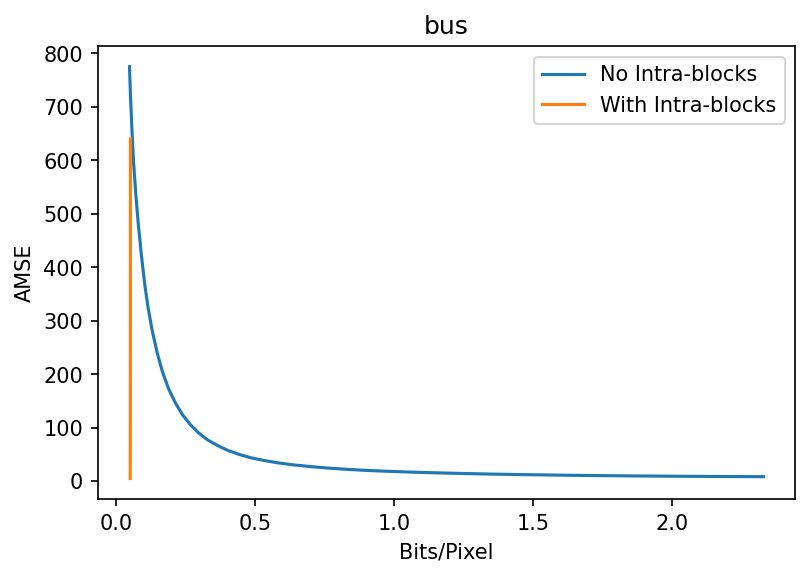

In [41]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()